In [17]:
import pandas as pd

In [18]:
data=pd.read_csv("SMSSpamCollection",delimiter='\t',names=['sms','message'])

In [19]:
data

,sms,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
data['sms']=le.fit_transform(data['sms'])

In [22]:
data.head()

,sms,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
v={'review':['i loved this food','services was very bad','i like the music']}

In [13]:
V=pd.DataFrame(v)

In [17]:
for i in V.index:
    V['review'][i]=V['review'][i].lower()

In [19]:
V

,review
0,i loved this food
1,services was very bad
2,i like the music


In [21]:
stopword=['i','this','very','was']

In [28]:
for i in V.index:
    f=[]
    for j in V['review'][i].split():
        if j not in stopword:
            f.append(j)
    V['review'][i]=' '.join(f)

In [29]:
V

,review
0,loved food
1,services bad
2,like the music


In [30]:
#STEMMING AND LEMMATIZATION

In [32]:
from nltk.stem.porter import PorterStemmer

In [33]:
ps= PorterStemmer()

In [34]:
ps.stem('caring')

'care'

In [35]:
pip install nltk


In [36]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
len(stopwords.words('english'))

179

In [40]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import STOPWORDS

In [42]:
import re


In [45]:
for i in data.index:
    temp=re.sub('[^A-Z a-z]','',data['message'][i])
    temp=temp.split()
    val=[ps.stem(i)  for i in temp if not i in stopwords.words('english')]
    data['message'][i]=' '.join(val)
   

<ipython-input-45-bd1169828211>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'][i]=' '.join(val)


In [46]:
data

,sms,message
0,0,Go jurong point crazi avail bugi n great world...
1,0,Ok lar joke wif u oni
2,1,free entri wkli comp win FA cup final tkt st m...
3,0,U dun say earli hor U c alreadi say
4,0,nah I dont think goe usf live around though
...,...,...
5567,1,thi nd time tri contact u U pound prize claim ...
5568,0,b go esplanad fr home
5569,0,piti mood soani suggest
5570,0,guy bitch I act like id interest buy someth el...


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [50]:
x=cv.fit_transform(data['message']).toarray()

In [51]:
y=data['sms']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [53]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [54]:
model.fit(xtrain,ytrain)

GaussianNB()

In [55]:
ypred=model.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,ypred)

0.8654708520179372

In [64]:
g=confusion_matrix(ytest,ypred)

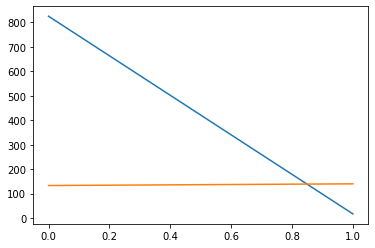

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(g)

In [59]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)